In [1]:
import numpy as np

In [2]:
#sigmoid and its derivative
def sigmoid(data):
    return 1 / (1 + np.exp(- data)) 
    
def sigmoid_prime(data):
    return sigmoid(data) * (1 - sigmoid(data))

In [3]:
''' Defining the data set and labels for different logical operators '''
input_dataset = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)

target_and = np.array([0,0,0,1])
target_or = np.array([0,1,1,1])
target_xor = np.array([0,1,1,0])
target_nand = np.array([1,1,1,0])
target_nor = np.array([1,0,0,0])

In [4]:
'''This class represents one perceptron'''
class Perceptron:
    def __init__(self, input_pairs):
        # the amount of inputs the perceptron receives
        self.input_pairs = input_pairs
        
        #initialize the weights of the Perceptron: the number of weights is given by the number of incoming inputs
        self.weights = np.random.randn(input_pairs)
        
        #every perceptron has one bias
        self.bias = np.random.randn(1)
        
        self.drive = 0
        self.input = 0
        
        #define the learning rate
        self.learning_rate = 1
    
    '''In this function the output of the perceptron can be computed.
    args: the input values the neuron receives
    returns: the output/activation of the neuron'''
    def forward_step(self, input_pair): 
        
        self.input = input_pair
        
        # the drive is the initial activation of the neuron (before being evaluated by the activation function):
        # the weighted inputs plus bias
        self.drive = self.weights @ input_pair + self.bias
        
        #return the output of the activation function (when fed with the drive)
        return sigmoid(self.drive)
    
    ''' The update function allows to update the weights and biases of the Perceptron given the error.
    Args: delta: error term needed for appropriate updates'''
    def update(self, delta):
        # new weight is calculated by substracting the learning rate times the derivative (gradient) from the old weihgt
        self.weights = self.weights - (self.learning_rate * (delta * self.input))
            
        # update bias
        self.bias = self.bias - self.learning_rate * delta
        

In [5]:
 ''' MLP with only one hidden layer. 
     Initialized with the number of neurons in the 
    hidden layer and the amount of initial inputs to the multi-layer perceptron.
    Contains a function to forward_step and backward_step'''

class MLP:
   
    def __init__(self, nr_input_pairs, nr_hidden_neurons):
        
        # Initialize list with neurons in hidden layer (number of neurons given by parameters)
        self.hiddenlayer = []
        
        for elem in range(nr_hidden_neurons):
            self.hiddenlayer.append(Perceptron(nr_input_pairs))

        # initialize output layer
        self.output_neuron = Perceptron(nr_hidden_neurons)
            
        self.output = 0
    
    
    '''Calculate the current output for the network given a specific input
        args: the input provided to the network
        function saves the output''' 
    def forward_step(self, input_pairs):
        
        #for each neuron in the hidden layer compute the output and save the outputs in a numpy array (activations_hl)
        activations_hl = np.array([neuron.forward_step(input_pairs) for neuron in self.hiddenlayer])
        #reshape the array so that it does not contain 4 separate lists, but rather one list with four elements
        activations_hl = np.reshape(activations_hl, newshape= (-1))
        
        #feed the activations of the hidden layer to the neuron of the output layer to compute the activation
        self.output = self.output_neuron.forward_step(activations_hl)
    
    
    
    '''Function allows to iterate through the network backwords to update the weights and biases 
        args: the target value the network should compute if it works correctly
        
        procedure:
        # start with the output neuron: calculate the error term and adapt its weights and bias
        # then do the same for the hidden layer neurons'''
    def backward_step(self, target):
        #delta for output layer (error term)
        delta_output_layer = -(target - self.output) * sigmoid_prime(self.output_neuron.drive)
        
        #backward_step in output layer
        self.output_neuron.update(delta_output_layer)
        
        # backward step for all neurons in the hidden layer, using their specific error term
        for elem in range(len(self.hiddenlayer)):
            #error term of the hidden layer neurons can be calculated from the delta of the output layer (l+1 -layer), 
            #the respective weight and drive
            delta_hidden = delta_output_layer * self.output_neuron.weights[elem] * sigmoid_prime(self.hiddenlayer[elem].drive)
            self.hiddenlayer[elem].update(delta_hidden)

In [6]:
'''Training the MLP'''
# Training the network for the logical XOR operator
target_labels = target_xor

#initialize a MLP with an input of 2 and a hidden layer with 4 Perceptrons
mlp = MLP(2,4)


steps = []
accuracies = []
loss = []

#perform 1000 training steps
for i in range(1000):
    #count current number of performed epochs
    steps.append(i)
    
    acc_sum = 0
    loss_sum = 0
    
    #for each sample in the dataset perform a forward and backword step to measure performance
    for count in range(4):
        #perform forward step and compare result to target
        mlp.forward_step(input_dataset[count])
        
        #perform backward step
        mlp.backward_step(target_labels[count])
        #add 1 to accuracy sum if output was correct (else 0)
        
        acc_sum += int(float(mlp.output>=0.5) == target_labels[count])
        loss_sum += pow((target_labels[count] - mlp.output), 2)
        
        
    #append the calculated values to the corresponding lists to measure loss and accuracy
    accuracies.append((acc_sum /4))
    loss.append(loss_sum)
   

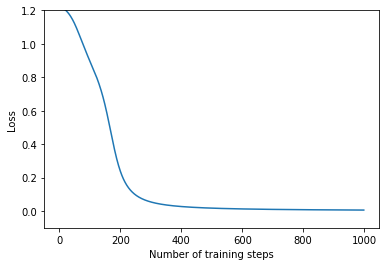

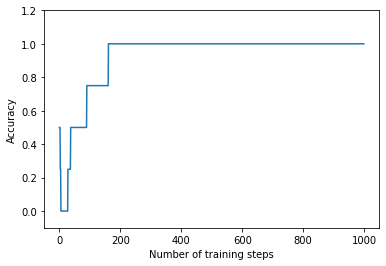

In [7]:
'''Visualization'''
import matplotlib.pyplot as plt

plt.figure("The Loss")
plt.plot(steps, loss)
plt.xlabel("Number of training steps")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

plt.figure("The accuracies")
plt.plot(steps, accuracies)
plt.xlabel("Number of training steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()